In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
import plotly as py
import plotly.graph_objs as go

In [11]:
df=pd.read_csv('./data.csv',encoding='ISO-8859-1',dtype={'CustomerID':str})
print(df.shape)
print(df.info())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None


In [12]:
missing_rate=df.apply(lambda x:sum(x.isnull())/len(x))
print(missing_rate)

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64


In [13]:
df.drop(['Description'],axis=1,inplace=True)
print(df.shape)

(541909, 7)


In [14]:
# ID为空就删除改行
df.dropna(inplace=True)
print(df.shape)

(406829, 7)


In [15]:
print(df.head(1))

  InvoiceNo StockCode  Quantity     InvoiceDate  UnitPrice CustomerID  \
0    536365    85123A         6  12/1/2010 8:26       2.55      17850   

          Country  
0  United Kingdom  


In [16]:
df['date']=[x.split(' ')[0] for x in df['InvoiceDate']]
df['time']=[x.split(' ')[1] for x in df['InvoiceDate']]
df.drop(['InvoiceDate'],axis=1,inplace=True)
print(df.shape)

(406829, 8)


In [17]:
df['year']=[x.split('/')[2] for x in df['date']]
df['month']=[x.split('/')[0] for x in df['date']]
df['day']=[x.split('/')[1] for x in df['date']]
df['date']=pd.to_datetime(df['date'])
print(df.shape)
print(df.head(1))

(406829, 11)
  InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country  \
0    536365    85123A         6       2.55      17850  United Kingdom   

        date  time  year month day  
0 2010-12-01  8:26  2010    12   1  


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   InvoiceNo   406829 non-null  object        
 1   StockCode   406829 non-null  object        
 2   Quantity    406829 non-null  int64         
 3   UnitPrice   406829 non-null  float64       
 4   CustomerID  406829 non-null  object        
 5   Country     406829 non-null  object        
 6   date        406829 non-null  datetime64[ns]
 7   time        406829 non-null  object        
 8   year        406829 non-null  object        
 9   month       406829 non-null  object        
 10  day         406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 37.2+ MB
None


In [19]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(406829, 11)
(401602, 11)


In [20]:
print(df.describe())

            Quantity      UnitPrice
count  401602.000000  401602.000000
mean       12.182579       3.474064
std       250.283248      69.764209
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000


In [22]:
return_rate=df[df['Quantity']<0].shape[0]/df['Quantity'].shape[0]
print(return_rate)

0.022091523448588404


In [25]:
df1=df[df['Quantity']<=0]
print(df1.shape)

(8872, 11)


In [26]:
df2=df[df['UnitPrice']<=0]
print(df2.shape)

(40, 11)


In [30]:
df['total_price']=df['Quantity']*df['UnitPrice']
df1['total_price']=df1['Quantity']*df1['UnitPrice']

C:\Users\gdmmx\AppData\Local\Temp/ipykernel_28064/3359828142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_price']=df1['Quantity']*df1['UnitPrice']


TypeError: unsupported operand type(s) for /: 'method' and 'method'

In [33]:
return_rate=np.abs(df1['total_price'].sum()/df[df['Quantity']>0]['total_price'].sum())
print(return_rate)

0.06849476321480963


In [35]:
return_pic=pd.pivot_table(df1,index=['year'],columns=['month'],aggfunc={'total_price':np.sum},margins=False)
print(return_pic)

      total_price                                                     \
month           1        10        11         12         2         3   
year                                                                   
2010          NaN       NaN       NaN  -18049.87       NaN       NaN   
2011    -94369.41 -62336.07 -29390.54 -175651.01 -10550.85 -15505.55   

                                                                   
month         4         5         6         7         8         9  
year                                                               
2010        NaN       NaN       NaN       NaN       NaN       NaN  
2011  -43151.66 -30343.48 -53183.53 -25850.58 -28972.95 -21333.97  


In [37]:
print(type(return_pic))
print(return_pic.shape)

<class 'pandas.core.frame.DataFrame'>
(2, 12)


In [42]:
return_data=return_pic.fillna(0)
print(return_data)
print(return_data.iloc[1])

      total_price                                                     \
month           1        10        11         12         2         3   
year                                                                   
2010         0.00      0.00      0.00  -18049.87      0.00      0.00   
2011    -94369.41 -62336.07 -29390.54 -175651.01 -10550.85 -15505.55   

                                                                   
month         4         5         6         7         8         9  
year                                                               
2010       0.00      0.00      0.00      0.00      0.00      0.00  
2011  -43151.66 -30343.48 -53183.53 -25850.58 -28972.95 -21333.97  
(2, 12)
             month
total_price  1            0.00
             10           0.00
             11           0.00
             12      -18049.87
             2            0.00
             3            0.00
             4            0.00
             5            0.00
             6          

In [45]:
df2=df[(df['Quantity']>0)&(df['UnitPrice']>0)]
normal_pic=pd.pivot_table(df2,index=['year'],columns=['month'],values=['total_price'],
                          aggfunc={'total_price':np.sum},margins=False)
print(normal_pic)

      total_price                                                           \
month           1          10          11         12          2          3   
year                                                                         
2010          NaN         NaN         NaN  570422.73        NaN        NaN   
2011    568101.31  1035642.45  1155668.61  517190.44  446084.92  594081.76   

                                                                           
month           4         5          6           7          8           9  
year                                                                       
2010          NaN       NaN        NaN         NaN        NaN         NaN  
2011   468374.331  677340.3  660046.05  598962.901  644051.04  950690.202  


In [47]:
normal_pic.fillna(0)
return_rate_month=-return_pic/normal_pic
print(return_rate_month)

      total_price                                                            \
month           1        10        11        12         2       3         4   
year                                                                          
2010          NaN       NaN       NaN  0.031643       NaN     NaN       NaN   
2011     0.166114  0.060191  0.025432  0.339625  0.023652  0.0261  0.092131   

                                                         
month         5         6         7         8         9  
year                                                     
2010        NaN       NaN       NaN       NaN       NaN  
2011   0.044798  0.080575  0.043159  0.044985  0.022441  


In [61]:
#rfm模型分析
r_value=df2.groupby(by='CustomerID')['date'].max()
print(r_value.head(10))

CustomerID
12346   2011-01-18
12347   2011-12-07
12348   2011-09-25
12349   2011-11-21
12350   2011-02-02
12352   2011-11-03
12353   2011-05-19
12354   2011-04-21
12355   2011-05-09
12356   2011-11-17
Name: date, dtype: datetime64[ns]


In [76]:
r_max=df2['date'].max()
r=(r_max-r_value).dt.days
print(r.head(10))

CustomerID
12346    325
12347      2
12348     75
12349     18
12350    310
12352     36
12353    204
12354    232
12355    214
12356     22
Name: date, dtype: int64


In [71]:
f=df2.groupby('CustomerID')['InvoiceNo'].nunique()
print(f.head(10))

CustomerID
12346    1
12347    7
12348    4
12349    1
12350    1
12352    8
12353    1
12354    1
12355    1
12356    3
Name: InvoiceNo, dtype: int64


In [73]:
m=df2.groupby('CustomerID')['total_price'].sum()
print(m.head())

CustomerID
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
Name: total_price, dtype: float64


In [74]:
print(r.describe())

count                           4338
mean      92 days 01:25:38.589211618
std      100 days 00:17:39.630484461
min                  0 days 00:00:00
25%                 17 days 00:00:00
50%                 50 days 00:00:00
75%                141 days 18:00:00
max                373 days 00:00:00
Name: date, dtype: object


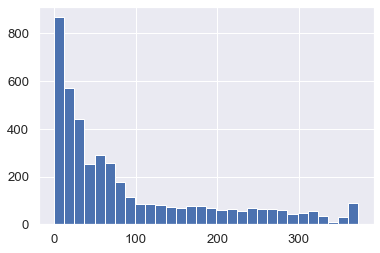

In [82]:
import seaborn as sns
sns.set(style='darkgrid',context='notebook',font_scale=1.2)
plt.rcParams['axes.unicode_minus']=False
plt.hist(r,bins=30)
plt.show()

In [78]:
print(f.describe())

count    4338.000000
mean        4.272015
std         7.697998
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       209.000000
Name: InvoiceNo, dtype: float64


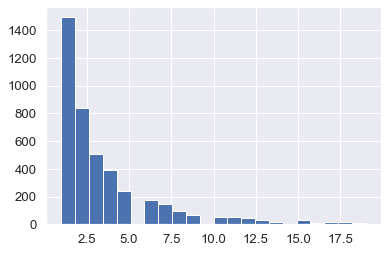

In [91]:
plt.hist(f[f<20],bins=22)
plt.show()

count      4338.000000
mean       2048.560868
std        8984.682547
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: total_price, dtype: float64


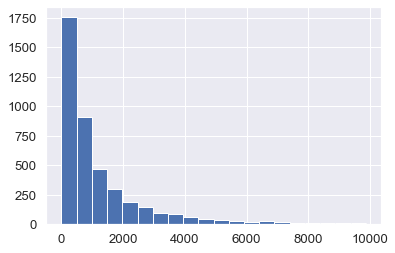

In [99]:
print(m.describe())
plt.hist(m[m<10000],bins=20)
plt.show()

In [101]:
r_bins = [0,30,90,180,360,720]
f_bins = [1,2,5,10,20,500]
m_bins = [0,500,2000,5000,10000,300000]
r_score = pd.cut(r,r_bins, labels = [5,4,3,2,1], right=False)
f_score = pd.cut(f,f_bins, labels = [1,2,3,4,5], right=False)
m_score = pd.cut(m,m_bins, labels = [1,2,3,4,5], right=False)
print(r_score)
print(f_score)
print(m_score)

CustomerID
12346    2
12347    5
12348    4
12349    5
12350    2
        ..
18280    2
18281    2
18282    5
18283    5
18287    4
Name: date, Length: 4338, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]
CustomerID
12346    1
12347    3
12348    2
12349    1
12350    1
        ..
18280    1
18281    1
18282    2
18283    4
18287    2
Name: InvoiceNo, Length: 4338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]
CustomerID
12346    5
12347    3
12348    2
12349    2
12350    1
        ..
18280    1
18281    1
18282    1
18283    3
18287    2
Name: total_price, Length: 4338, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


In [103]:
rfm=pd.concat([r_score,f_score,m_score],axis=1)
print(rfm)

           date InvoiceNo total_price
CustomerID                           
12346         2         1           5
12347         5         3           3
12348         4         2           2
12349         5         1           2
12350         2         1           1
...         ...       ...         ...
18280         2         1           1
18281         2         1           1
18282         5         2           1
18283         5         4           3
18287         4         2           2

[4338 rows x 3 columns]


In [107]:
rfm.rename(columns={'date':'r_score','InvoiceNo':'f_score','total_price':'m_score'},inplace=True)
print(rfm.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   r_score  4338 non-null   category
 1   f_score  4338 non-null   category
 2   m_score  4338 non-null   category
dtypes: category(3)
memory usage: 47.2+ KB
None


In [111]:
print(rfm.dtypes)
rfm=rfm.astype(float)
print(rfm.dtypes)

r_score    category
f_score    category
m_score    category
dtype: object
r_score    float64
f_score    float64
m_score    float64
dtype: object


In [112]:
rfm['total_score']=rfm['r_score']+rfm['f_score']+rfm['m_score']
print(rfm.head())

            r_score  f_score  m_score  total_score
CustomerID                                        
12346           2.0      1.0      5.0          8.0
12347           5.0      3.0      3.0         11.0
12348           4.0      2.0      2.0          8.0
12349           5.0      1.0      2.0          8.0
12350           2.0      1.0      1.0          4.0


In [113]:
print(rfm['total_score'].describe())

count    4338.000000
mean        7.735823
std         2.617286
min         3.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        15.000000
Name: total_score, dtype: float64
